In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
plt.style.use('seaborn-v0_8-whitegrid')

In [3]:
train = pd.read_csv('/kaggle/input/bank-chrun-classification/train.csv')
test = pd.read_csv('/kaggle/input/bank-chrun-classification/test.csv')

In [4]:
train.shape,test.shape

((165034, 14), (110023, 13))

In [5]:
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [6]:
train.tail()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.0,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.0,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.0,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.0,1,0.0,1.0,71173.03,0
165033,165033,15732798,Ulyanov,850,France,Male,31.0,1,0.0,1,1.0,0.0,61581.79,1


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  object 
 5   Gender           110023 non-null  object 
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 10.9+ MB


In [9]:
train.drop(columns=['id','CustomerId','Surname'],inplace=True)
test.drop(columns=['id','CustomerId','Surname'],inplace=True)

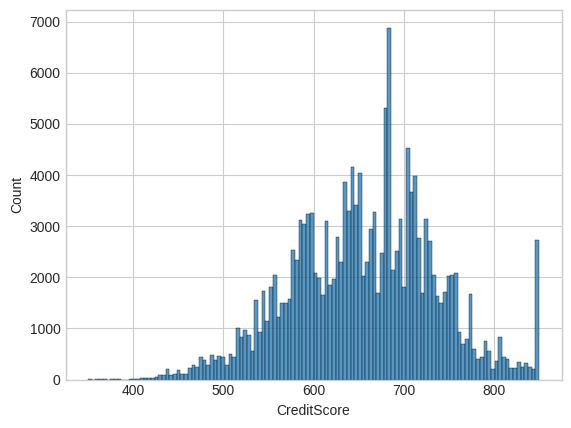

In [10]:
sns.histplot(data=train,x=train['CreditScore'])
plt.show()

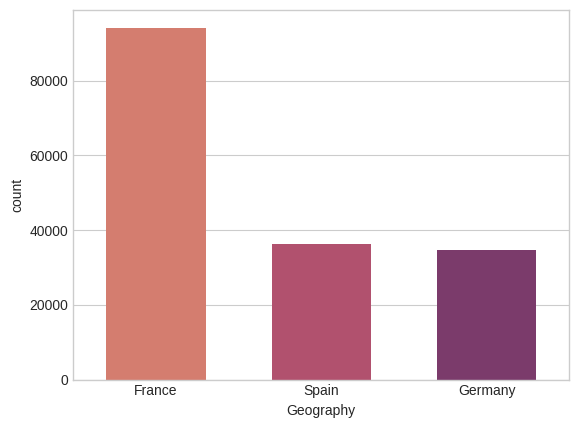

In [11]:
sns.countplot(data=train,x=train['Geography'],width=0.6,palette='flare')
plt.show()

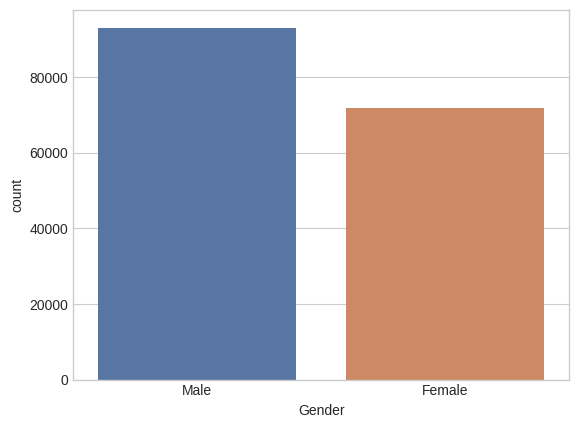

In [12]:
sns.countplot(data=train,x='Gender',palette='deep')
plt.show()


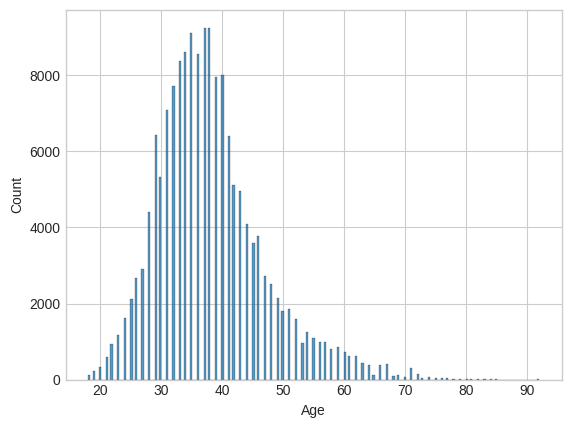

In [13]:
sns.histplot(data=train,x='Age',palette='flare')
plt.show()

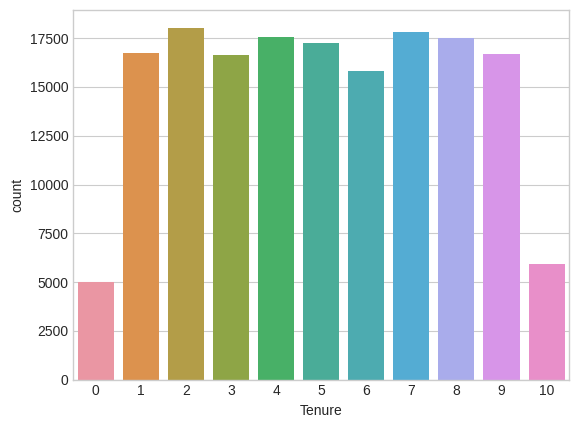

In [14]:
sns.countplot(data=train,x='Tenure')
plt.show()

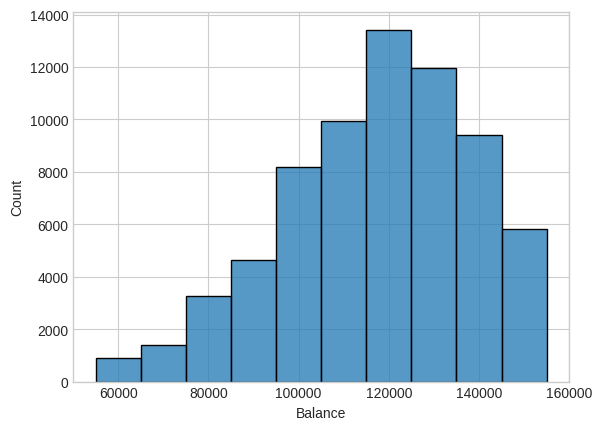

In [15]:
sns.histplot(data=train,x='Balance',bins=[55000,65000,75000,85000,95000,105000,115000,125000,135000,145000,155000])
plt.show()

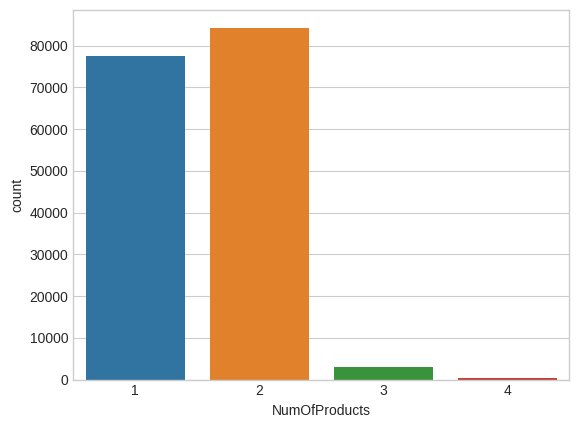

In [16]:
sns.countplot(data=train,x='NumOfProducts')
plt.show()

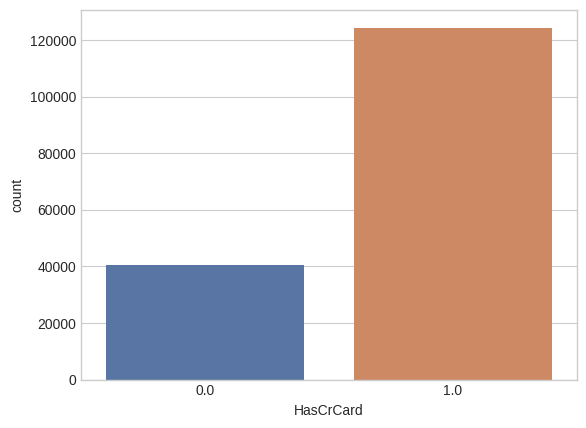

In [17]:
sns.countplot(data=train,x='HasCrCard',palette='deep')
plt.show()

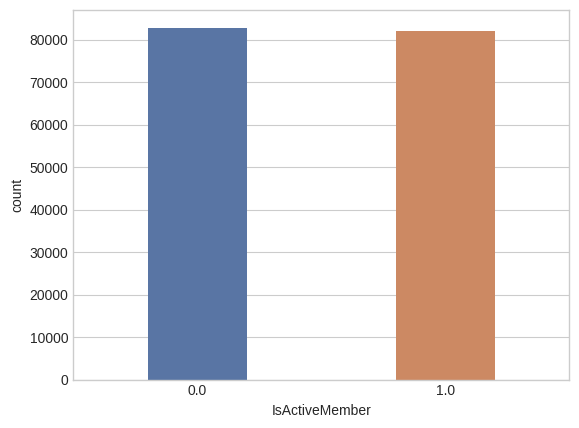

In [18]:
sns.countplot(data=train,x=train['IsActiveMember'],width=0.4,palette='deep')
plt.show()

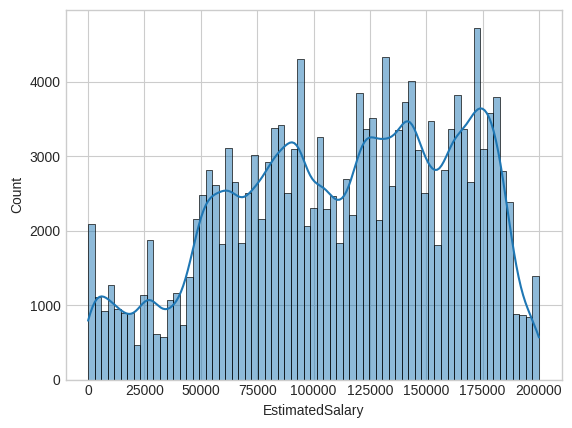

In [19]:
sns.histplot(data=train,x=train['EstimatedSalary'],kde=True)
plt.show()

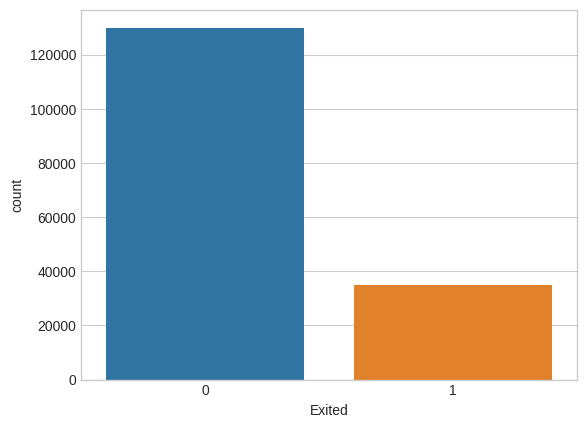

In [20]:
sns.countplot(data=train,x=train['Exited']) ## output column
plt.show()

In [21]:
### Bivariate Analysis
pd.crosstab(train['Geography'],train['Gender'])

Gender,Female,Male
Geography,,
France,39976,54239
Germany,16388,18218
Spain,15520,20693


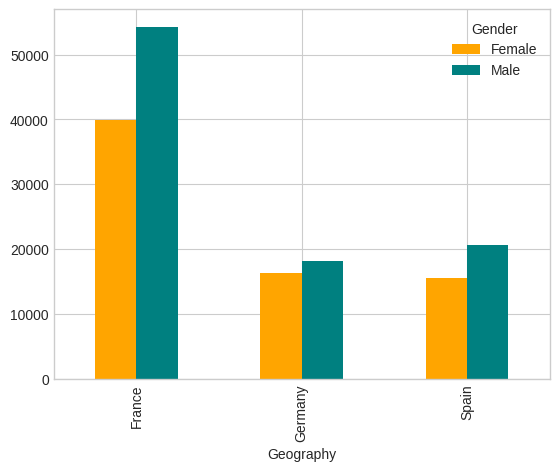

In [22]:
pd.crosstab(train['Geography'],train['Gender']).plot(kind='bar',color=['orange','teal'])
plt.show()

In [23]:
pd.crosstab(train['Gender'],train['Tenure'])


Tenure,0,1,2,3,4,5,6,7,8,9,10
Gender,,,,,,,,,,,
Female,2266,7374,7935,7410,7617,7420,6863,7700,7532,7176,2591
Male,2741,9386,10110,9220,9937,9848,8959,10110,9988,9533,3318


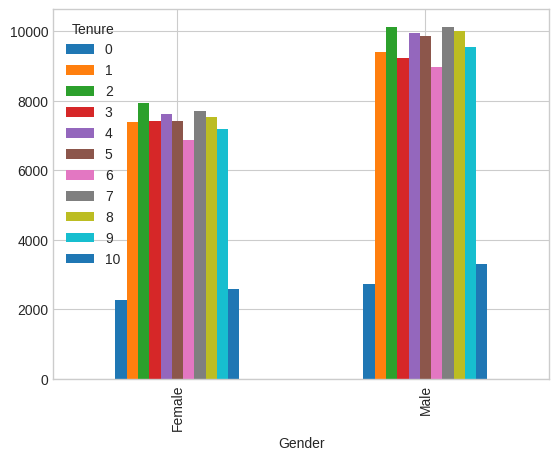

In [24]:
pd.crosstab(train['Gender'],train['Tenure']).plot(kind='bar')
plt.show()

<Axes: >

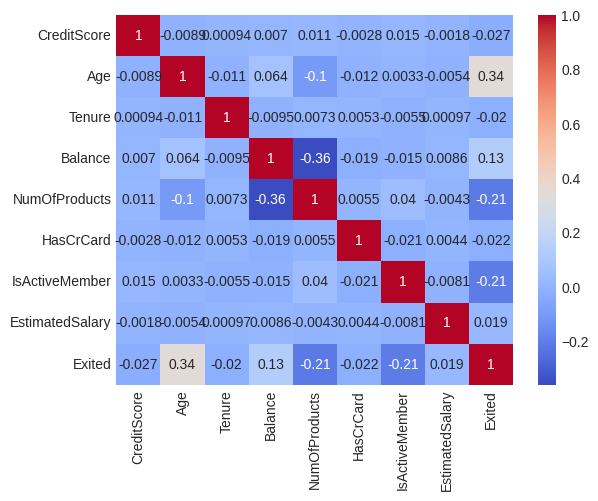

In [25]:
num_cols = train.select_dtypes('number')
corr = num_cols.corr()
sns.heatmap(corr,cmap='coolwarm',annot=True)

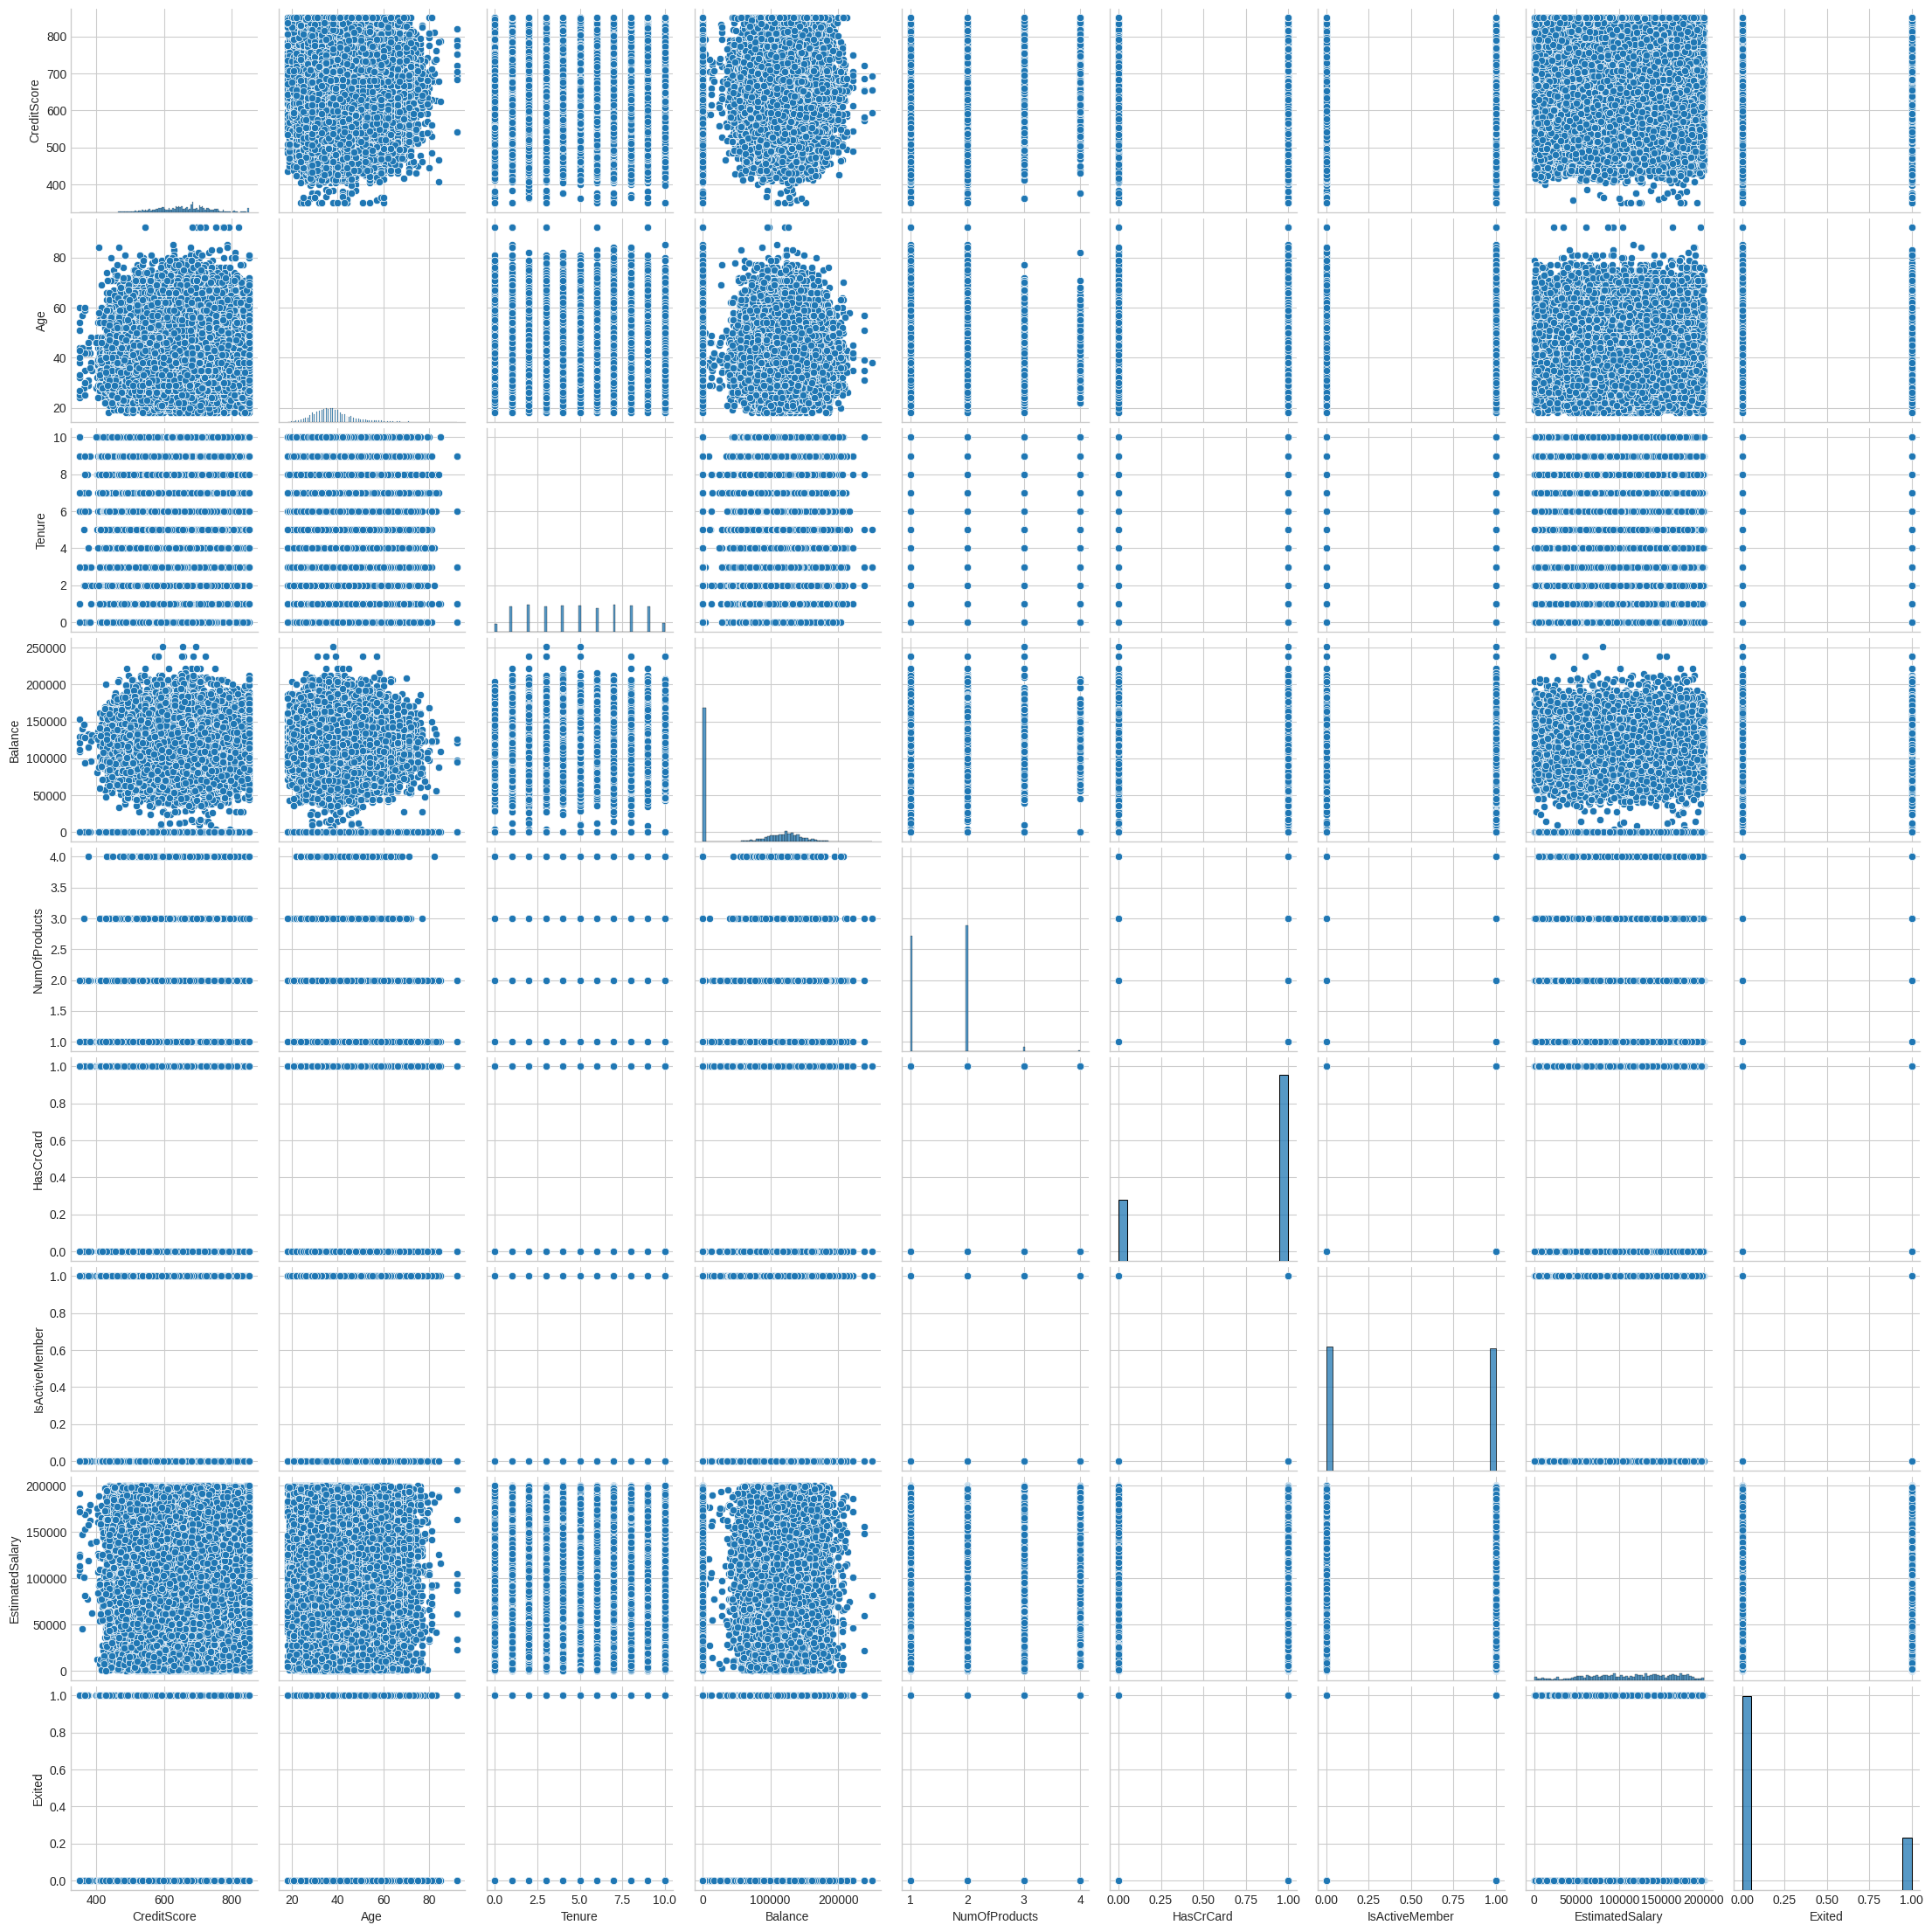

In [26]:
sns.pairplot(data=train)

In [27]:
X = train.drop('Exited', axis=1)  
y = train['Exited']            

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
transformer = ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(sparse_output=False),[1,2]),
    ('std_scaler', StandardScaler(),[0, 3, 4, 5, 6]),
],remainder='passthrough')

In [28]:
parameters = {
    'C' : [0.001,0.01,0.1,1,2,5,10,20,30,40,50,60,70,100],
    'solver':['liblinear','newton-cholesky'],
    'max_iter': [10,100,1000]
}
clf = LogisticRegression()
cv = GridSearchCV(clf,parameters,cv=10,scoring='neg_mean_squared_error')
pipe = Pipeline(steps=[
    ('trf',transformer),
    ('classifier',cv)
])

In [29]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(sparse_output=False),
                                                  [1, 2]),
                                                 ('std_scaler',
                                                  StandardScaler(),
                                                  [0, 3, 4, 5, 6])])),
                ('classifier',
                 GridSearchCV(cv=10, estimator=LogisticRegression(),
                              param_grid={'C': [0.001, 0.01, 0.1, 1, 2, 5, 10,
                                                20, 30, 40, 50, 60, 70, 100],
                                          'max_iter': [10, 100, 1000],
                                          'solver': ['liblinear',
                                                     'newton-cholesky']},
                              scoring='neg_mean_squared_error'))])

In [30]:
y_pred = pipe.predict(X_val)
accuracy_score(y_pred,y_val)

0.8353985518223407

In [31]:
print(classification_report(y_pred,y_val))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90     29127
           1       0.39      0.70      0.50      3880

    accuracy                           0.84     33007
   macro avg       0.67      0.78      0.70     33007
weighted avg       0.89      0.84      0.85     33007



In [32]:
cv.best_estimator_

LogisticRegression(C=2, max_iter=10, solver='newton-cholesky')

In [33]:
print(cv.best_params_)

{'C': 2, 'max_iter': 10, 'solver': 'newton-cholesky'}


In [34]:
cv.best_score_

-0.1661175180618848

In [35]:
cv.scoring

'neg_mean_squared_error'